# Fig07_PR-CCS

    Author: Andreas Prein
    E-mail: prein@ucar.edu
    Date created: 27.12.2019
    Date last modified: 27.12.2019

    ##############################################################
    Purpos:

    1) Show the grid spacing dependence of extreme precipitation 
    climate change signals

    2) Read in preprocessed data from:
    
    ~/papers/Idealized-MCSs/programs/ClimateChangeSignals/Extreme_PR_CCS.py

In [1]:
from dateutil import rrule
import datetime
import glob
from netCDF4 import Dataset
import sys, traceback
import dateutil.parser as dparser
import string
from pdb import set_trace as stop
import numpy as np
import numpy.ma as ma
import os
# from mpl_toolkits import basemap
import ESMF
import pickle
import subprocess
import pandas as pd
from scipy import stats
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pylab as plt
import random
import scipy.ndimage as ndimage
import matplotlib.gridspec as gridspec
# from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from pylab import *
import string
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile
# import shapely.geometry
# import descartes
import shapefile
import math
from scipy.stats.kde import gaussian_kde
from math import radians, cos, sin, asin, sqrt
from scipy import spatial
import matplotlib.path as mplPath
from pylab import *
from scipy.optimize import curve_fit
import scipy
import math
import SkewT
from scipy.interpolate import interp1d
from thermodynamics import Theta
# from astropy.io import ascii
from scipy.ndimage import gaussian_filter

In [2]:
# User settings
rgrGridSpacing=['12000','12000nc','4000','2000','1000','500','250']
rgrDX=[12000,12000,4000,2000,1000,500,250]
sGrid='12km'
iSmoothKM=36000 # smoothing filter lenth in m
iPR_threshold=5  # precipitation threshold in mm/h
sDataOut='/glade/scratch/prein/Papers/Idealized_MCSs/data/CCS/Extreme_PR/'+sGrid+'/'+'CCS-PR_Smooth-'+str(iSmoothKM)+'_PR-TH-'+str(iPR_threshold)+'_20191227.npz'
sPlotDir='/glade/u/home/prein/papers/Idealized-MCSs/plots/Fig04_Drafts/'

### Load the preprocessed data

In [3]:
DATA=np.load(sDataOut)
P99_accumulation=DATA['P99_accumulation']
TimeAccumulation=DATA['TimeAccumulation']
Percentiles=DATA['Percentiles']
rgsSimulations=DATA['rgsSimulations']
rgrGridSpacing=DATA['rgrGridSpacing']
RankedPRmax=DATA['RankedPRmax']

# the 12km nc simulations has erroneous PR data
P99_accumulation[1,1,:,:]=np.nan
RankedPRmax[1,1,:]=np.nan

### Process the data

In [4]:
Time=TimeAccumulation*5/60.

# Are changes significant
Significance=np.zeros((P99_accumulation.shape[1],P99_accumulation.shape[2],P99_accumulation.shape[3])); Significance[:]=np.nan
for dx in range(P99_accumulation.shape[1]):
    for ac in range(P99_accumulation.shape[2]):
        for pe in range(P99_accumulation.shape[3]):
            Current=P99_accumulation[:10,dx,ac,pe]; Current=Current[~np.isnan(Current)]
            Future=P99_accumulation[-10:,dx,ac,pe]; Future=Future[~np.isnan(Future)]
            Significance[dx,ac,pe]=scipy.stats.mannwhitneyu(Current,Future)[1]

### Plotting

/gpfs/u/apps/dav/opt/python/2.7.14/intel/17.0.1/pkg-library/20180510/lib/python2.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in divide
/gpfs/u/apps/dav/opt/python/2.7.14/intel/17.0.1/pkg-library/20180510/lib/python2.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in divide


        Plot map to: /glade/u/home/prein/papers/Idealized-MCSs/plots/Fig04_Drafts/Fig07_Extreme-PR_CCS.pdf


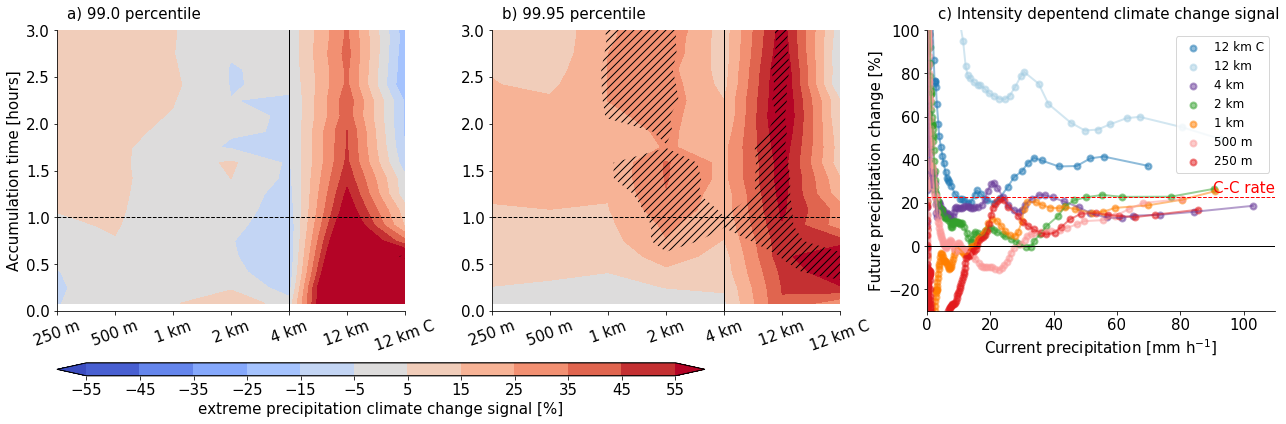

In [7]:
# set the font size
rgsLableABC=list(string.ascii_lowercase)

fig = plt.figure(figsize=(18,6))
plt.rcParams.update({'font.size': 15})
gs1 = gridspec.GridSpec(1,3)
gs1.update(left=0.05, right=0.99,
           bottom=0.25, top=0.9,
           wspace=0.25, hspace=0.3)

# Plot the heatmap plots
Percentile=[1,4]
for per in range(2):
    ax = plt.subplot(gs1[0,per])

    pe=Percentile[per]
    CCS=((np.nanmean(P99_accumulation[-10:,:,:,pe], axis=0)-np.nanmean(P99_accumulation[:10,:,:,pe], axis=0))/np.nanmean(P99_accumulation[:10,:,:,pe], axis=0))*100
    Levels=np.linspace(-55,55,12)
    cs=plt.contourf(rgrGridSpacing[::-1],Time,CCS[::-1,:].transpose(), levels=Levels, cmap='coolwarm', extend='both')
    # cs=plt.imshow(CCS.transpose(), cmap='coolwarm', interpolation='nearest', vmin=-55, vmax=55)
    plt.contourf(rgrGridSpacing[::-1],Time,Significance[::-1,:,pe].transpose(), levels=[0,0.1,1],hatches=['///',None], facecolor="none",fill=False, colors='none')
    
    xx = range(7)
    labels = [ '12 km C',  '12 km',  '4 km', '2 km','1 km','500 m', '250 m']
    plt.xticks(xx, labels[::-1], rotation=20)
    if per == 0:
        ax.set_ylabel('Accumulation time [hours]')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(0, 6)
    plt.axhline(y=0, c='k', lw=0.5)
    plt.ylim(0.0,3)
    ax.axvline(x=4, ls='-', c='k', zorder=10, alpha=1, lw=1)
    ax.axhline(y=1, ls='--', c='k', zorder=10, alpha=1, lw=1)

    ax.text(0.03,1.03, rgsLableABC[per]+') '+str(Percentiles[pe])+' percentile', ha='left',va='bottom', \
            transform = ax.transAxes, fontname="Times New Roman Bold") #, fontsize=17)
    # add colorbar
    CbarAx = axes([0.05,0.1, 0.5, 0.03])
    cb = colorbar(cs, cax = CbarAx, orientation='horizontal', extend='both', label='extreme precipitation climate change signal [%]', ticks=Levels)
    
# # Plot the Q-Q plot
# per=2
# ax = plt.subplot(gs1[0,per])

# # plot helper lines
# LIM=130
# plt.plot([0,LIM],[0,LIM], c='k', ls='-', lw=0.5)
# plt.text(LIM*0.85,LIM*0.85,'no change',rotation=40, va='center',ha='center', fontsize=12)
# plt.plot([0,LIM],[0,LIM*1.3], c='k', ls='--', lw=0.5)
# plt.text(LIM*0.75,LIM*0.75*1.3,'+30 %',rotation=48, va='center',ha='center', fontsize=12)
# plt.plot([0,LIM],[0,LIM*1.6], c='k', ls='--', lw=0.5)
# plt.text(LIM*0.65,LIM*0.65*1.6,'+60 %',rotation=55, va='center',ha='center', fontsize=12)
# # plt.plot([0,LIM*1.3],[0,LIM], c='k', ls='--', lw=0.5)

# Colors=['#1f78b4','#a6cee3','#6a3d9a','#33a02c','#ff7f00','#fb9a99','#e31a1c']
# for dx in range(P99_accumulation.shape[1]):
#     plt.plot(np.nanmean(RankedPRmax[:10,dx,:-1], axis=0), np.nanmean(RankedPRmax[-10:,dx,:-1], axis=0), c=Colors[dx], lw=2, alpha=0.5)
#     plt.scatter(np.nanmean(RankedPRmax[:10,dx,:-1], axis=0), np.nanmean(RankedPRmax[-10:,dx,:-1], axis=0), c=Colors[dx], lw=2, alpha=0.5, label=labels[dx])

# ax.set_ylabel('Future precipitation [mm h$^{-1}$]')
# ax.set_xlabel('Current precipitation [mm h$^{-1}$]')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.xlim(0, LIM)
# plt.ylim(0,LIM)

# plt.legend(loc="lower right",
#     ncol=1, prop={'size':12})

# ax.text(0.03,1.03, rgsLableABC[per]+') Q-Q diagram', ha='left',va='bottom', \
#             transform = ax.transAxes, fontname="Times New Roman Bold") #, fontsize=17)

# Plot the Q-Q plot
per=2
ax = plt.subplot(gs1[0,per])

Colors=['#1f78b4','#a6cee3','#6a3d9a','#33a02c','#ff7f00','#fb9a99','#e31a1c']
for dx in range(P99_accumulation.shape[1]):
    CCSrelative=((np.nanmean(RankedPRmax[-10:,dx,:], axis=0)-np.nanmean(RankedPRmax[:10,dx,:], axis=0))/np.nanmean(RankedPRmax[:10,dx,:], axis=0))*100. 
    yhat= gaussian_filter(CCSrelative, sigma=1)
    
    plt.plot(np.nanmean(RankedPRmax[:10,dx,:], axis=0), yhat, c=Colors[dx], lw=2, alpha=0.5)
    plt.scatter(np.nanmean(RankedPRmax[:10,dx,:], axis=0), yhat, c=Colors[dx], lw=2, alpha=0.5, label=labels[dx])

ax.set_ylabel('Future precipitation change [%]')
ax.set_xlabel('Current precipitation [mm h$^{-1}$]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0, 110)
plt.ylim(-30,100)

plt.legend(loc="upper right",
    ncol=1, prop={'size':12})

ax.text(0.03,1.03, rgsLableABC[per]+') Intensity depentend climate change signal', ha='left',va='bottom', \
            transform = ax.transAxes, fontname="Times New Roman Bold") #, fontsize=17)

ax.axhline(y=0, ls='-', c='k', zorder=10, alpha=1, lw=1)
ax.axhline(y=3.5*6.5, ls='--', c='r', zorder=10, alpha=1, lw=1)
ax.text(110,3.5*6.5+0.5,'C-C rate',color='r',ha='right',va='bottom')

# Plot the figure
sPlotFile=sPlotDir
sPlotName= 'Fig07_Extreme-PR_CCS.pdf'
if os.path.isdir(sPlotFile) != 1:
    subprocess.call(["mkdir","-p",sPlotFile])
print '        Plot map to: '+sPlotFile+sPlotName
fig.savefig(sPlotFile+sPlotName)

In [6]:
yhat=signal.savgol_filter(CCSrelative, 11, 3)

In [8]:
yhat.shape

(2600,)

In [9]:
RankedPRmax.shape

(20, 7, 2601)